In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 100

In [2]:
price = pd.read_csv('../data/raw/TwoPeakHDP.csv')
price_day = price.iloc[0:24]
price_day['Datetime'] = pd.to_datetime(price_day['Datetime'])
price_day['hour'] = price_day['Datetime'].dt.hour
price_day = price_day.drop(columns=['Datetime'])
price_day

<ipython-input-2-575068e5d3d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_day['Datetime'] = pd.to_datetime(price_day['Datetime'])
<ipython-input-2-575068e5d3d0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_day['hour'] = price_day['Datetime'].dt.hour


,Price,hour
0,0.1440,0
1,0.1385,1
2,0.1518,2
3,0.1829,3
4,0.2713,4
5,0.4659,5
6,0.5328,6
7,0.2800,7
8,0.1158,8
9,0.0398,9


## Single day dynamic price

interpolating hourly price to 10-minute indexed price

In [17]:
day_idx = np.arange(144)
interp_price = np.zeros_like(day_idx).astype('float')
interp_price[0] = price_day['Price'].values[-1]

for i in day_idx:
    if (i+1) % 6 == 0:
        interp_price[i] = price_day['Price'].values[int((i+1)/6)-1]
    elif i == 0:
        pass
    else:
        interp_price[i] = np.NaN

In [18]:
price_day_idx = pd.DataFrame(data={
    'idx': day_idx,
    'price': interp_price
})

# price_day_idx['price'] = price_day_idx['price'].interpolate(method='polynomial', order=3, limit_direction='both')
price_day_idx['price'] = price_day_idx['price'].interpolate(method='linear', limit_direction='both')

In [9]:
price_day_idx.head(20)

,idx,price
0,0,0.171400
1,1,0.165920
2,2,0.160440
3,3,0.154960
4,4,0.149480
5,5,0.144000
6,6,0.143083
7,7,0.142167
8,8,0.141250
9,9,0.140333


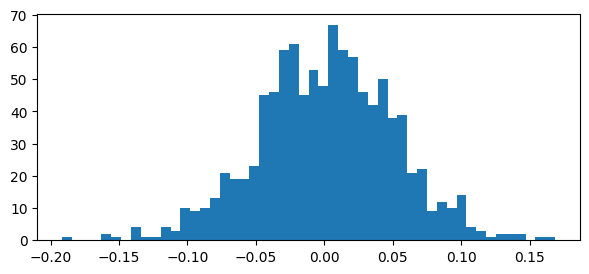

In [10]:
plt.figure(figsize=(7, 3))
plt.hist(np.random.normal(0, 0.05, 1000), bins=50)
plt.show()

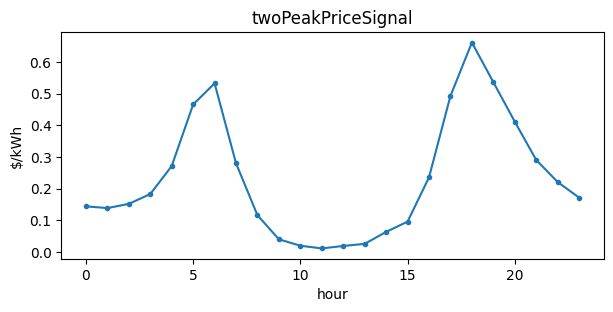

In [11]:
plt.figure(figsize=(7, 3))
plt.plot(price_day.hour, price_day.Price, '-o', markersize=3)
plt.xlabel('hour')
plt.ylabel('$/kWh')
plt.title('twoPeakPriceSignal')
plt.show()

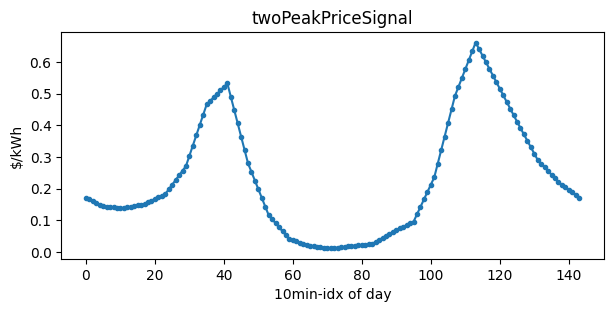

In [19]:
plt.figure(figsize=(7, 3))
plt.plot(price_day_idx.idx, price_day_idx.price, '-o', markersize=3)
plt.xlabel('10min-idx of day')
plt.ylabel('$/kWh')
plt.title('twoPeakPriceSignal')
plt.show()

In [20]:
price_day_idx.to_csv('../data/price_day_idx_144.csv')

interpolating hourly price to 12-minute indexed price

In [3]:
day_idx = np.arange(120)
interp_price = np.zeros_like(day_idx).astype('float')
interp_price[0] = price_day['Price'].values[-1]

for i in day_idx:
    if (i+1) % 5 == 0:
        interp_price[i] = price_day['Price'].values[int((i+1)/5)-1]
    elif i == 0:
        pass
    else:
        interp_price[i] = np.NaN

price_day_idx = pd.DataFrame(data={
    'idx': day_idx,
    'price': interp_price
})

price_day_idx['price'] = price_day_idx['price'].interpolate(method='linear', limit_direction='both')

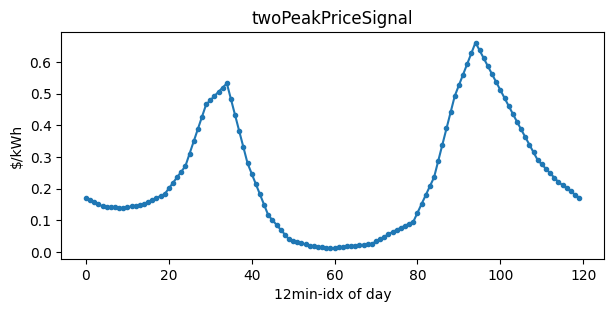

In [15]:
plt.figure(figsize=(7, 3))
plt.plot(price_day_idx.idx, price_day_idx.price, '-o', markersize=3)
plt.xlabel('12min-idx of day')
plt.ylabel('$/kWh')
plt.title('twoPeakPriceSignal')
plt.show()

In [16]:
price_day_idx.to_csv('../data/price_day_idx_12min.csv')

## Day-in-the-week dynamic price
interpolating hourly price to 10-minute indexed price, for each day in the week

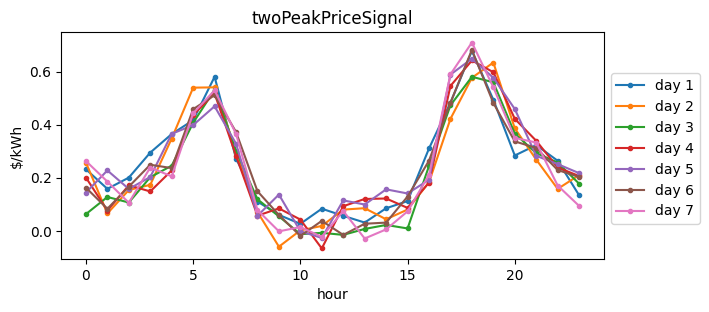

In [21]:
np.random.seed(0)

plt.figure(figsize=(7, 3))
price_week = []

for i in np.arange(7):
    price_week.append(
        price_day.Price + np.random.normal(0, 0.05, 24)
    )
    plt.plot(price_day.hour, price_week[i], '-o', markersize=3, label=f'day {i+1}')

plt.xlabel('hour')
plt.ylabel('$/kWh')
plt.title('twoPeakPriceSignal')
plt.legend(bbox_to_anchor=(1, 0.85))
plt.show()

In [22]:
day_idx = np.arange(144)

for day in np.arange(len(price_week)):

    price_day = price_week[day]
    interp_price = np.zeros_like(day_idx).astype('float')
    interp_price[0] = price_day.values[-1]

    for i in day_idx:
        if (i+1) % 6 == 0:
            interp_price[i] = price_day.values[int((i+1)/6)-1]
        elif i == 0:
            pass
        else:
            interp_price[i] = np.NaN

    price_day_idx = pd.DataFrame(data={
        'idx': day_idx,
        'price': interp_price
    })

    price_day_idx['price'] = price_day_idx['price'].interpolate(method='linear', limit_direction='both')
    price_day_idx.to_csv(f'../data/price_day_{day}_idx_144.csv')

In [20]:
min(price_day_idx['price'])

0.011